In [1]:
# Make sure you are using the right TensorFlow Version
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Import packages

In [2]:
import numpy as np
import tensorflow as tf
# Keras is TensorFlow's high-level API for deep learning
from tensorflow import keras
import matplotlib.pyplot as plt
import math

# Generate data

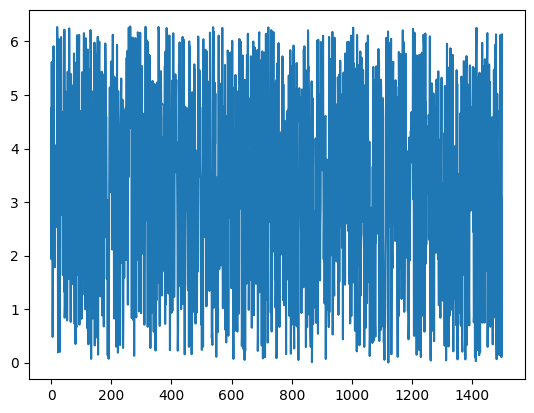

In [3]:
# Number of sample datapoints
SAMPLES = 1500

# Set a "seed" value, so we get the same random numbers each time we run this
# notebook for reproducible results. Any number can be used here.
np.random.seed(786)
tf.random.set_seed(786)

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

# Let's visualize x_values to see if the x_values are random or
# concentrated in one area
plt.plot(x_values)
plt.show()

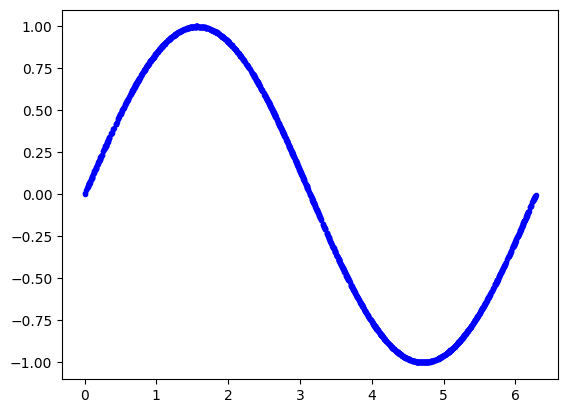

In [4]:
# You can also shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

# Add noise
Real world sensor data is rarely this smooth. For example, if you would have collect an accelerometer data for training it would have been noisy. To reflect real-world situation let's add some noise to the output.

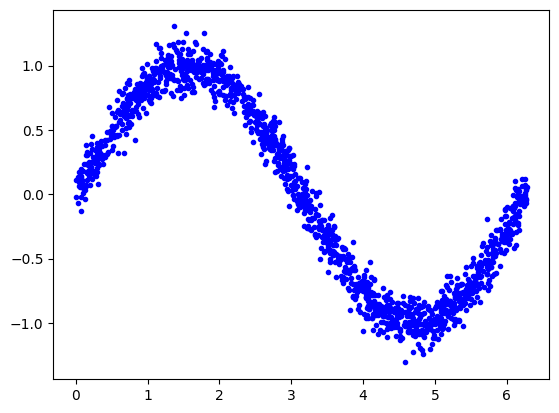

In [5]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

We now have a noisy dataset that approximates real world data.

# Split the Data
It is a common practice to split the data into 60-20-20 for training and testing. The data is split as follows:
  1. Training: 60%
  2. Validation: 20%
  3. Testing: 20%

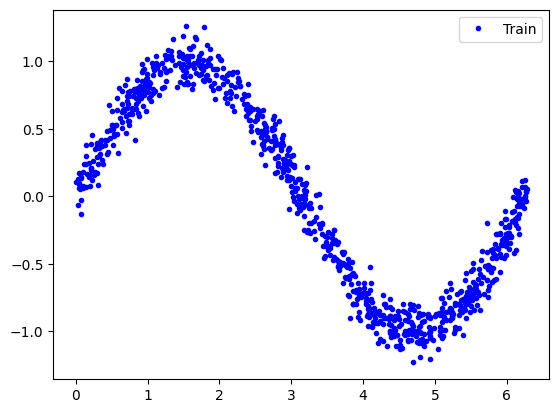

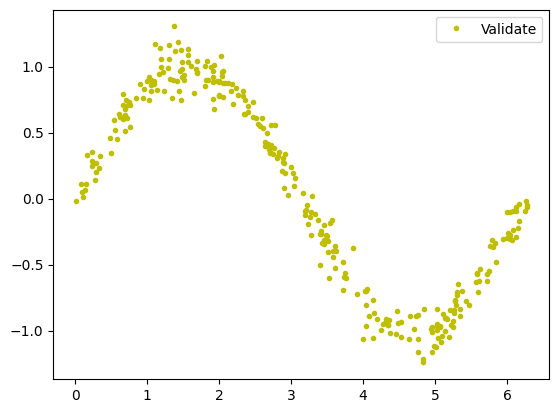

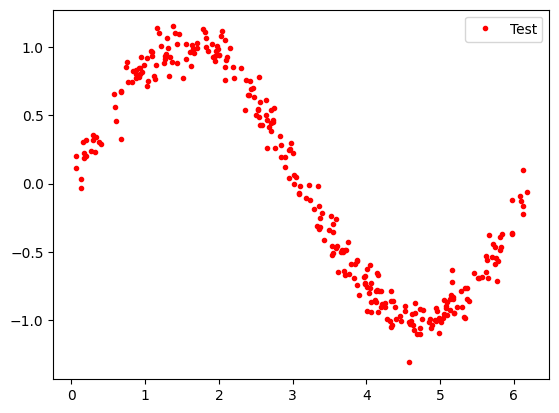

In [6]:
# We'll use 60% of our data for training and 20% for validation. The remaining 20%
# will be used for testing. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition.
# We have to make sure that each set, train, validation and test, has the full
# range of x values, 0 to 2pi
plt.plot(x_train, y_train, 'b.', label="Train")
plt.legend()
plt.show()

plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()

plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()

# Design the model
The model is going to predict a numeric value based on a numeric input. This type of problem is known as regression. We are going to solve this using neural network.

In neural network you have neurons (think of it as a node in a [mesh network](https://en.wikipedia.org/wiki/Mesh_networking)). Each of these neurons has weight and bias value. During training, these values are changed, by a _**activation function**_, that you will choose, to match its prediction with the actual output. A _**loss function**_ will be used to see how far the predictions are from the actual value and the training process will try to minimize this value.

You can have any numbers of layers of neurons. But the more neurons leads to more complexity, and hence will also increase the size of the model. We will be using two layers of 16 neurons (i.e. 32 neurons), with one input layer and one output layer.



In [7]:
# We'll use Keras to create a simple model architecture
model = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model.add(keras.layers.Dense(16, activation='relu', input_shape=(1,)))

# The second layer of 16 neurons. Note input connected to the first layer.
# As this is a sequential model, all the first layer neuron will be connected
# to this second layer.
model.add(keras.layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model.add(keras.layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train the model
During training, model will predict the output of a corrsponding input `x` and will check how far it is from the actual value. then it will adjust the neurons' weights and biases to match the actual output.

Epoch: Training runs this process on the full dataset multiple times, and each full run-through is known as an epoch and we can set this parameter. Don't use high number of epochs. Otherwise the model will overfit their training data.

Batch Size: During each epoch, you can adjust the weights and biases after each input. Or you can update those values in batches. For example, use 16 samples, aggregate their correctness results and then update weights and biases based on that. Choosing 1 as batch size will take forever to train, choosing the whole data as batch size will result in less accurate model. Its a trial and error situation. Thumb of rule is start with a batch size of 16 or 32 and increase from their to see what works best for you.

In [8]:
training_info = model.fit(x_train, y_train, epochs=350, batch_size=64, validation_data=(x_validate, y_validate))

Epoch 1/350
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 0.9387 - mae: 0.8462 - val_loss: 0.7394 - val_mae: 0.7720
Epoch 2/350
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6994 - mae: 0.7485 - val_loss: 0.6213 - val_mae: 0.7140
Epoch 3/350
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5577 - mae: 0.6731 - val_loss: 0.5659 - val_mae: 0.6725
Epoch 4/350
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4882 - mae: 0.6248 - val_loss: 0.5380 - val_mae: 0.6461
Epoch 5/350
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4499 - mae: 0.5941 - val_loss: 0.5182 - val_mae: 0.6282
Epoch 6/350
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4245 - mae: 0.5721 - val_loss: 0.4968 - val_mae: 0.6113
Epoch 7/350
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3998 - mae: 0.5516 - val_loss: 0.4542 - val_mae: 0.5851
Epoch 8/350
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3595 - mae: 0.5233 - val_loss: 0.4023 - val_mae: 0.5542
Epoch 9/350
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.32

# Plot Metrics
During each training epoch, the model prints out its loss and mean absolute error for training and validation as you can see in the output above (note that your exact numbers may differ):

```
Epoch 350/350
15/15 [==============================] - 0s 4ms/sample - loss: 0.0105 - mae: 0.0809 - val_loss: 0.0108 - val_mae: 0.0803
```

Let's see that on a graph how model's performance changed over time:

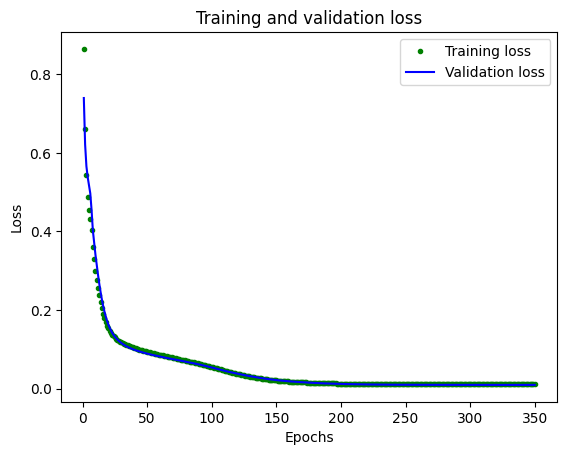

In [9]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = training_info.history['loss']
validation_loss = training_info.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The loss rapidly decresed at the beginnig before flattening out at the end. To make flatter part more readable let's skip first 50 epochs:

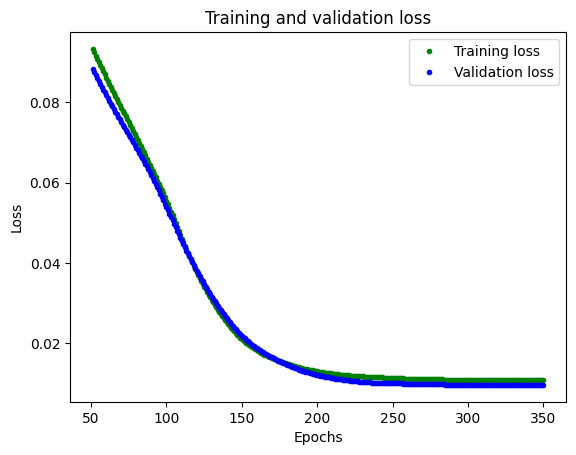

In [10]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 50

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], validation_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

From the plot, we can see that loss continues to reduce until around 200 epochs, at which point it is mostly stable.

We can also see that the lowest loss value is around 0.0108. This means that our network's predictions are off by an average of ~1%. Which is really good.

Let's plot the mean absolute error, which is another way of measuring how far the network's predictions are from the actual numbers:

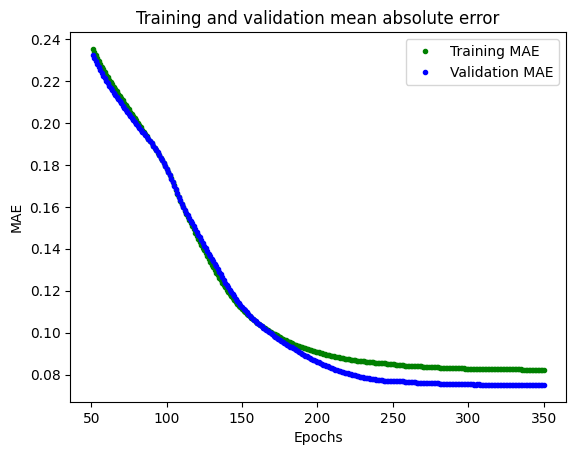

In [11]:
plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = training_info.history['mae']
validation_mae = training_info.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], validation_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

We can see that metrics are better for validation than training and that means the network is not overfitting. This means our network seems to be performing well! To confirm, let's check its predictions against the **Test** dataset we set aside earlier:

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0110 - mae: 0.0820
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


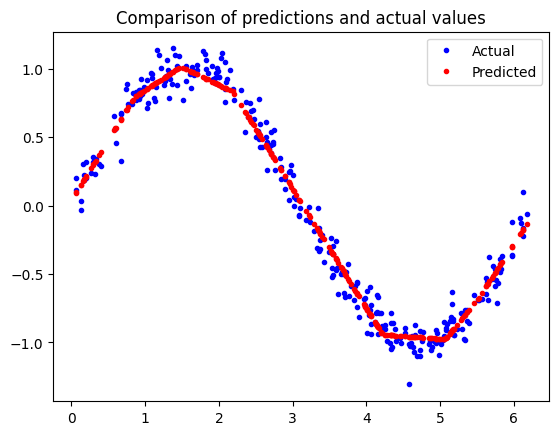

In [12]:
# Calculate and print the loss on our test dataset
loss = model.evaluate(x_test, y_test)

# Make predictions based on our test dataset
predictions = model.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

Looks really great! The model isn't perfect; its predictions don't form a smooth sine curve. If we wanted to go further, we could try further increasing the capacity of the model.

However, an important part of machine learning is knowing when to quit, and this model is good enough for our use case - which is to show a sine wave pattern on an LCD.

## Generate a TensorFlow Lite Model

We now have an acceptably accurate model. We'll use the [TensorFlow Lite Converter](https://www.tensorflow.org/lite/convert) to convert the model into a special, space-efficient format for use on memory-constrained devices.

In [13]:
# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# Set the optimization flag.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the model to disk
open("sinewave_model.tflite", "wb").write(tflite_model)

Saved artifact at '/tmp/tmplro8e0wf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139985781422032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139985781422800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139985739239440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139985739238096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139985739240208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139985739239056: TensorSpec(shape=(), dtype=tf.resource, name=None)


3168

The model size is 2.5KB! Sweet!

# Generate C files
Let's generate C source and header file of this model for microcontroller. TF Lite has a Python method to convert TF Lite model into C source and header files.

In [14]:
from tensorflow.lite.python.util import convert_bytes_to_c_source

source_text, header_text = convert_bytes_to_c_source(tflite_model,
                                                     "sine_model",
                                                     include_path="sine_model.h")
with open('sine_model.h', 'w') as file:
    file.write(header_text)

with open('sine_model.cpp', 'w') as file:
    file.write(source_text)
